<a href="https://colab.research.google.com/github/imeddyhi/tests/blob/main/Copia_de_%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Pose Landmarks Detection with MediaPipe Tasks
Este cuaderno le muestra cómo utilizar la API Python de MediaPipe Tasks para detectar puntos de referencia de pose a partir de imágenes.

## Preparación

Comencemos instalando MediaPipe.


In [5]:
!pip install -q mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


Luego descargue un paquete de modelos listo para usar. Revise la [documentación de MediaPipe](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker#models) para obtener más información sobre este paquete de modelos.

In [6]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

## Utilidades de visualización

In [7]:
# @markdown Para demostrar mejor la API Pose Landmarker, hemos creado un conjunto de herramientas de visualización que se utilizarán en esta colaboración. Estos dibujarán los puntos de referencia de una persona detectada, así como las conexiones esperadas entre esos marcadores.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Recorre las poses detectadas para visualizar.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Dibuja los puntos de referencia de la pose.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

## Descargar imagen de prueba

Para demostrar la API Pose Landmarker, puede descargar una imagen de muestra usando el siguiente código. La imagen es de [Pixabay](https://pixabay.com/photos/girl-woman-fitness-beautiful-smile-4051811/).

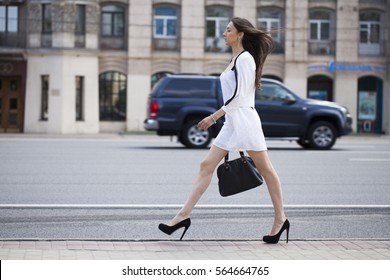

In [17]:
!wget -q -O image.jpg https://www.shutterstock.com/image-photo/portrait-full-growth-young-beautiful-260nw-564664765.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

Opcionalmente, puedes subir tu propia imagen. Si desea hacerlo, descomente el código y ejecute la celda a continuación.

In [8]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

Saving png-transparent-people-walking-sneezing-baby-miscellaneous-child-people-thumbnail.png to png-transparent-people-walking-sneezing-baby-miscellaneous-child-people-thumbnail (1).png
Uploaded file: png-transparent-people-walking-sneezing-baby-miscellaneous-child-people-thumbnail (1).png


## Ejecutar inferencias y visualizar los resultados.

El último paso es ejecutar la detección de puntos de referencia de pose en la imagen seleccionada. Esto implica crear su objeto PoseLandmarker, cargar su imagen, ejecutar la detección y, finalmente, el paso opcional de mostrar la imagen con visualizaciones.

Revisar la [documentación de MediaPipe](https://developers.google.com/mediapipe/solutions/vision/pose_landmarker/python) para obtener más información sobre las opciones de configuración que admite esta solución.


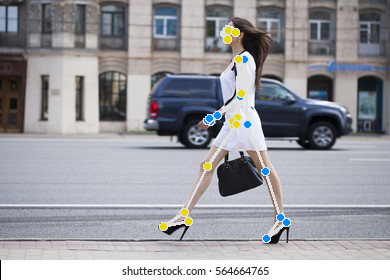

In [18]:
# PASO 1: Importe los módulos necesarios.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# PASO 2: Crea un objeto PoseLandmarker.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# PASO 3: Cargue la imagen de entrada.
image = mp.Image.create_from_file("image.jpg")

# PASO 4: Detectar puntos de referencia de pose a partir de la imagen de entrada.
detection_result = detector.detect(image)

# PASO 5: Procese el resultado de la detección. En este caso, visualízalo.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Visualice la máscara de segmentación de pose.

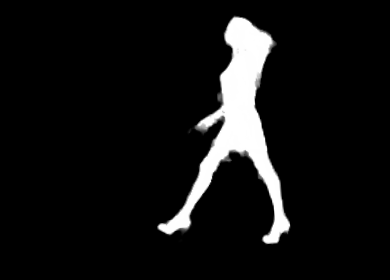

In [19]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
cv2_imshow(visualized_mask)